In [9]:
import os
import numpy as np
from matplotlib import pyplot

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd
import numpy as np
import os

# Montar Google Drive si estás en Google Colab
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
except:
    print("No estás usando Google Colab o no es necesario montar Google Drive.")

# Definir la ruta al archivo
file_path = '/content/gdrive/MyDrive/lab1/SolarPrediction.csv'  # Cambia según tu entorno

# Verificar si el archivo existe
if not os.path.exists(file_path):
    print(f"El archivo {file_path} no existe.")
else:
    # Cargar el archivo CSV
    try:
        data = pd.read_csv(file_path)
        print("Archivo CSV cargado correctamente.")
        print(data.head())
    except FileNotFoundError:
        print(f"El archivo {file_path} no se encontró.")
    except pd.errors.ParserError as e:
        print(f"Error al parsear el archivo CSV: {e}")
    except Exception as e:
        print(f"Error al cargar el archivo CSV: {e}")

    # Verificar las columnas y tipos de datos
    print("\nColumnas del CSV:")
    print(data.columns)

    print("\nTipos de datos de cada columna:")
    print(data.dtypes)

    # Define las columnas numéricas y la columna objetivo
    numeric_columns = ['Temperature', 'Pressure']  # Reemplaza con los nombres correctos
    target_column = 'Radiation'  # Reemplaza con el nombre correcto

    # Verificar la existencia de las columnas
    missing_columns = [col for col in numeric_columns + [target_column] if col not in data.columns]
    if missing_columns:
        print(f"Las siguientes columnas no se encontraron en el CSV: {missing_columns}")
    else:
        # Manejar valores faltantes
        print("\nValores faltantes por columna:")
        print(data[numeric_columns + [target_column]].isnull().sum())

        # Eliminar filas con valores faltantes
        data_clean = data.dropna(subset=numeric_columns + [target_column])

        # Convertir a numpy arrays después de limpiar
        X = data_clean[numeric_columns].values
        y = data_clean[target_column].values

        m = y.size
        print(f"\nTotal de ejemplos después de eliminar filas con valores faltantes: {m}")

        # Añadir columna de unos (intercepto)
        X = np.concatenate([np.ones((m, 1)), X], axis=1)

        # Imprimir algunos ejemplos
        print('\nPrimeros 10 ejemplos:')
        print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:,1]', 'y'))
        print('-' * 26)
        for i in range(10):
            try:
                # Convertir a enteros si es necesario
                val1 = int(X[i, 0])
                val2 = int(X[i, 1])
                val3 = int(y[i])
                print('{:8d}{:8d}{:10d}'.format(val1, val2, val3))
            except ValueError as e:
                print(f"Error en la fila {i}: {e}")


Mounted at /content/gdrive
Archivo CSV cargado correctamente.
     UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00  

Columnas del CSV:
Index(

In [13]:
X.shape

(32686, 3)

In [14]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [15]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 1.   48.   30.46]
 [ 1.   48.   30.46]
 [ 1.   48.   30.46]
 ...
 [ 1.   44.   30.42]
 [ 1.   44.   30.42]
 [ 1.   44.   30.43]]
Media calculada: [ 1.         51.10325522 30.42287891]
Desviación estandar calculada: [0.         6.2010625  0.05467232]
[[        nan -0.50043927  0.67897416]
 [        nan -0.50043927  0.67897416]
 [        nan -0.50043927  0.67897416]
 ...
 [        nan -1.14549002 -0.05265751]
 [        nan -1.14549002 -0.05265751]
 [        nan -1.14549002  0.1302504 ]]


<ipython-input-14-cfd32d010c1e>:8: RuntimeWarning: invalid value encountered in divide
  X_norm = (X - mu) / sigma


In [16]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

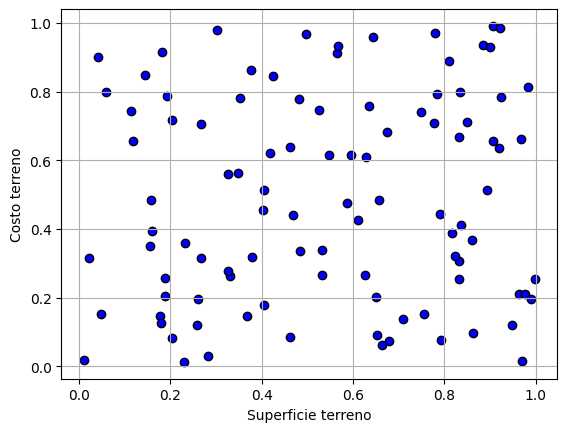

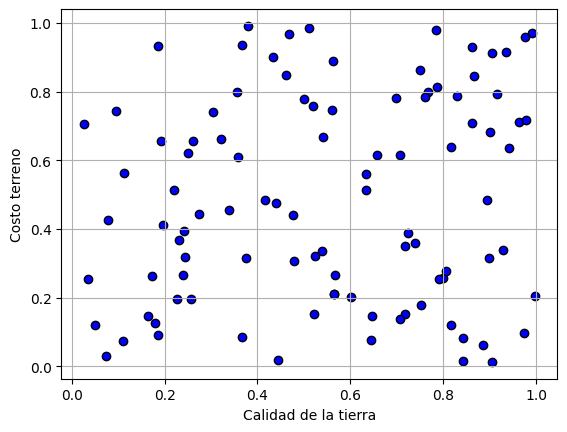

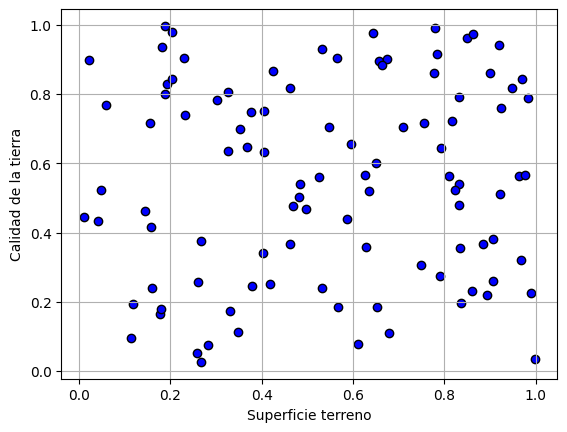

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo de datos normalizados (X_norm) y y
X_norm = np.random.rand(100, 2)  # 100 muestras, 2 características
y = np.random.rand(100)  # 100 muestras

# Función para graficar
def graficarDatos(x, y, xlabel, ylabel):
    plt.figure()
    plt.scatter(x, y, marker='o', c='b', edgecolor='k')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Etiquetas
xlabel1 = "Superficie terreno"
xlabel2 = "Calidad de la tierra"
ylabel1 = "Costo terreno"

# Graficar
graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 0], X_norm[:, 1], xlabel1, xlabel2)


In [23]:
import numpy as np

# Ejemplo: Suponiendo que X_norm tiene m filas y n características
X_norm = np.random.rand(100, 2)  # Ejemplo con 100 filas y 2 características
m = X_norm.shape[0]  # Número de ejemplos (filas)

# Crear una columna de unos con la misma cantidad de filas que X_norm
unos = np.ones((m, 1))

# Verificar que X_norm tiene dos dimensiones
if X_norm.ndim == 1:
    X_norm = X_norm.reshape(-1, 1)

# Verificar las dimensiones antes de concatenar
print("Dimensiones de 'unos':", unos.shape)
print("Dimensiones de 'X_norm':", X_norm.shape)

# Concatenar la columna de unos al inicio de la matriz X_norm
X_ready = np.concatenate([unos, X_norm], axis=1)

# Verificar la forma de X_ready
print("Forma de X_ready:", X_ready.shape)


Dimensiones de 'unos': (100, 1)
Dimensiones de 'X_norm': (100, 2)
Forma de X_ready: (100, 3)


In [24]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [25]:
theta=np.array([0.1, 5.0, 0.1])
JJ = calcularCosto(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1 5.  0.1] se obtiene un costo de: 3.768302607320801


In [26]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

los valores de theta calculados son: [0.38033074 0.13931342 0.05958639]
con un costo de: 0.04453525373349751 


Text(0, 0.5, 'Costo J')

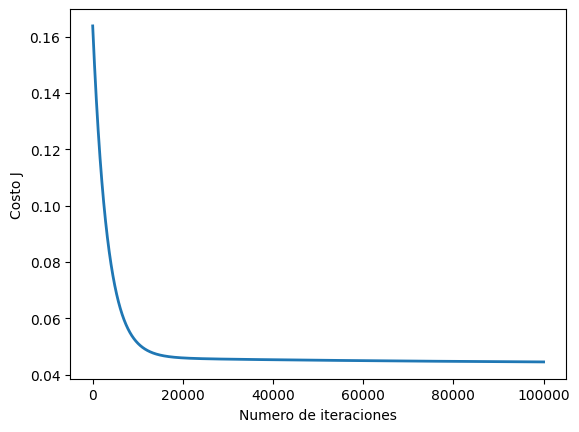

In [27]:
theta = np.zeros(3)

num_ite = 100000
alpha = 0.0001

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


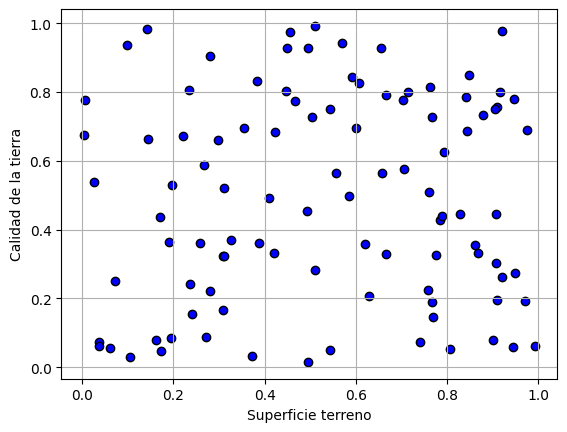

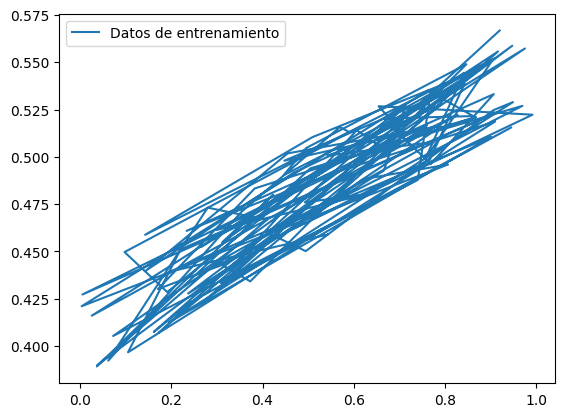

In [28]:
#graficarDatos(X[:, 1], y, xlabel1, ylabel1)
# graficarDatos(X[:, 2], y, xlabel2, ylabel1)
graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [29]:
# 2300,4,449900
y_pred = np.dot([1, 2305, 4], theta)
print(y_pred)

321.7361139208501


In [30]:
#Utilizando la ecuacion de la norma

In [31]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [33]:
import numpy as np

# Supongamos que X ya está definido y tiene m filas (ejemplos)
m = X.shape[0]  # Número de ejemplos (filas)

# Asegúrate de que X es una matriz 2D
if X.ndim == 1:
    X = X.reshape(-1, 1)

# Crear una columna de unos con el mismo número de filas que X
unos = np.ones((m, 1))

# Concatenar la columna de unos al inicio de la matriz X
X_ren = np.concatenate([unos, X], axis=1)

# Verificar la forma de X_ren
print("Forma de X_ren:", X_ren.shape)


Forma de X_ren: (32686, 4)


In [38]:
import numpy as np

def calcularThethaEcuacionNormal(X, y):
    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float)
    theta = np.linalg.pinv(X.T @ X) @ (X.T @ y)
    return theta

# Datos de ejemplo
X_norm = np.array([[1.5, 2.0], [2.5, 3.0], [3.5, 4.0]])
y = np.array([5.0, 7.0, 9.0])

# Agregar la columna de unos a X_norm
X_ren = np.concatenate([np.ones((X_norm.shape[0], 1)), X_norm], axis=1)

# Calcular theta
theta = calcularThethaEcuacionNormal(X_ren, y)

# Imprimir los valores de theta calculados
print(f"Los valores de theta calculados son: {theta}")


Los valores de theta calculados son: [1.33333333 0.66666667 1.33333333]


In [39]:
X_array = [1, 2305, 4]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $1543
